## 데이터 가져오기

In [5]:
!pip install kaggle --upgrade

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [6]:
!pip show kaggle

Name: kaggle
Version: 1.6.14
Summary: Kaggle API
Home-page: https://github.com/Kaggle/kaggle-api
Author: Kaggle
Author-email: support@kaggle.com
License: Apache 2.0
Location: /Users/yoonsjin/opt/anaconda3/lib/python3.9/site-packages
Requires: bleach, certifi, python-dateutil, python-slugify, requests, six, tqdm, urllib3
Required-by: 


In [7]:
!kaggle config view

Configuration values from /Users/yoonsjin/.kaggle
- username: seojin0911
- path: None
- proxy: None
- competition: None


In [8]:
!pip show kaggle

Name: kaggle
Version: 1.6.14
Summary: Kaggle API
Home-page: https://github.com/Kaggle/kaggle-api
Author: Kaggle
Author-email: support@kaggle.com
License: Apache 2.0
Location: /Users/yoonsjin/opt/anaconda3/lib/python3.9/site-packages
Requires: bleach, certifi, python-dateutil, python-slugify, requests, six, tqdm, urllib3
Required-by: 


In [9]:
!kaggle datasets download -d edumagalhaes/quality-prediction-in-a-mining-process

Dataset URL: https://www.kaggle.com/datasets/edumagalhaes/quality-prediction-in-a-mining-process
License(s): CC0-1.0
 98%|█████████████████████████████████████▎| 50.0M/50.9M [00:07<00:00, 7.95MB/s]
100%|██████████████████████████████████████| 50.9M/50.9M [00:07<00:00, 7.41MB/s]


In [2]:
from pathlib import Path
import numpy as np
import pandas as pd
import shutil

filename='quality-prediction-in-a-mining-process.zip'
extrac_dir='quality-prediction-in-a-mining-process'
archive_format='zip'
shutil.unpack_archive(filename, extrac_dir, archive_format)

/Users/yoonsjin/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/yoonsjin/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [3]:
import os
os.listdir('quality-prediction-in-a-mining-process')
os.getcwd()

'/Users/yoonsjin/Hands on Machine Learning/MLproject'

In [196]:
data=pd.read_csv('quality-prediction-in-a-mining-process/MiningProcess_Flotation_Plant_Database.csv')

In [197]:
for col in data.columns:
    if col!='date':
        data[col]=data[col].str.replace(',','.')
        data[col]=data[col].astype('float64')

In [198]:
#date의 타입을 float으로 변경
from datetime import datetime

for i in range(len(data['date'])):
    data.iloc[i,0]=datetime.strptime(data.iloc[i,0], '%Y-%m-%d %H:%M:%S').timestamp()

# len(data['date'])
print(data.iloc[:,0])

KeyboardInterrupt: 

In [199]:
data['date'].describe()

count                  737453
unique                   4098
top       2017-06-16 15:00:00
freq                      180
Name: date, dtype: object

## 데이터 이해를 위한 탐색

In [200]:
data.head()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,1489075200.0,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,1489075200.0,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,1489075200.0,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
3,1489075200.0,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,...,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
4,1489075200.0,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,...,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31


In [194]:
data['date']=data['date'].astype({'date':'float'})

In [201]:
data.describe()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
count,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,...,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000
mean,56.294739,14.651716,2869.140569,488.144697,397.578372,9.767639,1.680380,280.151856,277.159965,281.082397,...,290.754856,520.244823,522.649555,531.352662,420.320973,425.251706,429.941018,421.021231,65.050068,2.326763
std,5.157744,6.807439,1215.203734,91.230534,9.699785,0.387007,0.069249,29.621288,30.149357,28.558268,...,28.670105,131.014924,128.165050,150.842164,91.794432,84.535822,89.862225,84.891491,1.118645,1.125554
min,42.740000,1.310000,0.002026,241.669000,376.249000,8.753340,1.519820,175.510000,175.156000,176.469000,...,185.962000,149.218000,210.752000,126.255000,162.201000,166.991000,155.841000,175.349000,62.050000,0.600000
25%,52.670000,8.940000,2076.320000,431.796000,394.264000,9.527360,1.647310,250.281000,250.457000,250.855000,...,256.302000,416.978000,441.883000,411.325000,356.679000,357.653000,358.497000,356.772000,64.370000,1.440000
50%,56.080000,13.850000,3018.430000,504.393000,399.249000,9.798100,1.697600,299.344000,296.223000,298.696000,...,299.011000,491.878000,495.956000,494.318000,411.974000,408.773000,424.664575,411.065000,65.210000,2.000000
75%,59.720000,19.600000,3727.730000,553.257000,402.968000,10.038000,1.728330,300.149000,300.690000,300.382000,...,301.904000,594.114000,595.464000,601.249000,485.549000,484.329000,492.684000,476.465000,65.860000,3.010000
max,65.780000,33.400000,6300.230000,739.538000,418.641000,10.808100,1.853250,373.871000,375.992000,364.346000,...,371.593000,862.274000,828.919000,886.822000,680.359000,675.644000,698.861000,659.902000,68.010000,5.530000


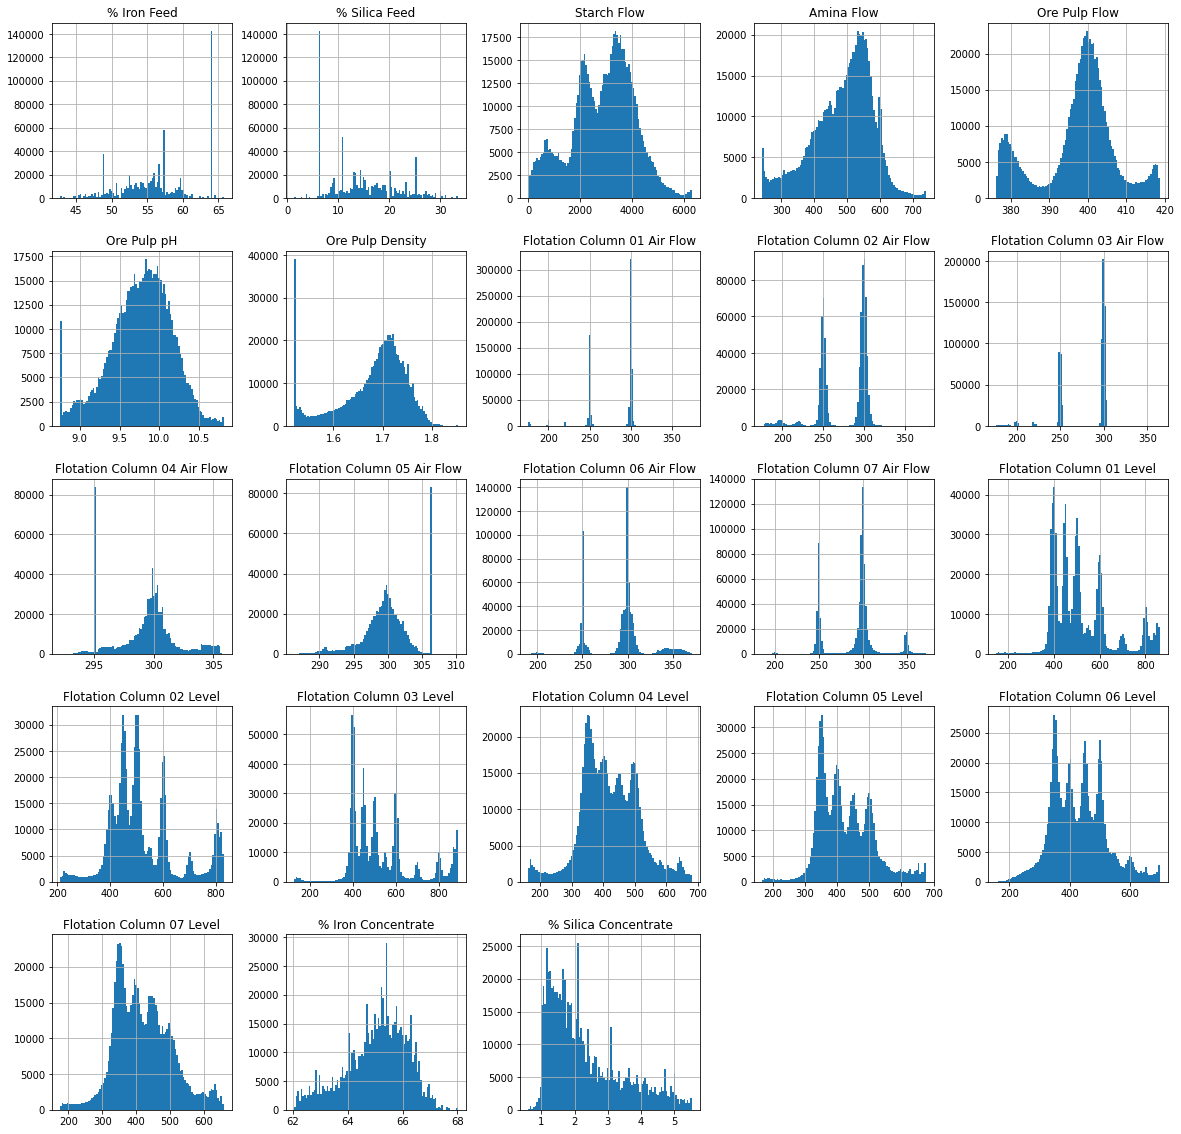

In [202]:
import matplotlib.pyplot as plt
data.hist(bins=100, figsize=(20,20))
plt.show()

## 데이터를 Test set과 Train set으로 나누는 다양한 방법

In [24]:
import numpy as np

#노트북 실행 결과를 일정하게 유지하기 위한 랜덤시드 설정
np.random.seed(42)

#랜덤으로 어떤 샘플을 선택해서 데이터셋을 test_ratio만큼 떼어놓는 함수
def shuffle_and_split_data(data, test_ratio):
    shuffled_indices=np.random.permutation(len(data))
    test_set_size=int(len(data)*test_ratio)
    test_indices=shuffled_indices[:test_set_size]
    train_indices=shuffled_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [8]:
#데이터의 15퍼센트를 test
train_set, test_set=shuffle_and_split_data(data,0.1)

In [9]:
len(train_set)

663708

In [10]:
len(test_set)

73745

In [203]:
#머신러닝 알고리즘이 전체 데이터셋을 보는 것을 막기 위해 데이터의 hash 값을 이용해 test set 생성하는 함수
from zlib import crc32

def is_id_in_test_set(identifier, test_ratio):
    return crc32(np.int64(identifier))<test_ratio*2**32

def split_data_with_id_hash(data, test_ratio, id_column):
    ids=data[id_column]
    in_test_set=ids.apply(lambda id_:is_id_in_test_set(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [204]:
data_with_id=data.reset_index()

# data_with_id.head()
# data.head()
train_set, test_set=split_data_with_id_hash(data_with_id, 0.1,"index")

<Axes: >

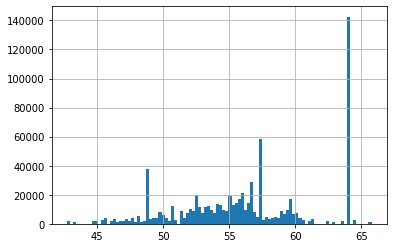

In [205]:
data["% Iron Feed"].hist(bins=100)

In [206]:
data["% Iron Feed cat"]=pd.cut(data["% Iron Feed"],
                              bins=[0.,45,50,55,60,65,np.inf],
                              labels=[1,2,3,4,5,6])

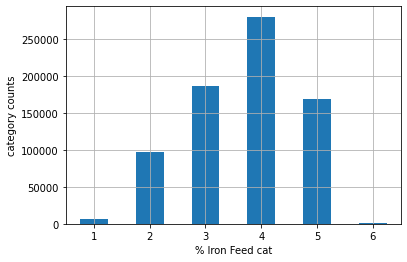

In [207]:
import matplotlib.pyplot as plt
data["% Iron Feed cat"].value_counts().sort_index().plot.bar(rot=0,grid=True)
plt.xlabel("% Iron Feed cat")
plt.ylabel("category counts")
plt.show()

In [208]:
#10개의 계층 분할을 생성해보기
from sklearn.model_selection import StratifiedShuffleSplit

splitter=StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=42)
strat_splits=[]
for train_index,test_index in splitter.split(data, data["% Iron Feed cat"]):
    strat_train_set_n=data.iloc[train_index]
    strat_test_set_n=data.iloc[test_index]
    strat_splits.append([strat_train_set_n,strat_test_set_n])

In [209]:
strat_train_set, strat_test_set=strat_splits[0]

In [210]:
#하나의 계층 분할을 생성하기 위한 가장 간단한 방법
from sklearn.model_selection import train_test_split

strat_train_set, strat_test_set=train_test_split(
    data, test_size=0.1,stratify=data["% Iron Feed cat"],random_state=42)

In [211]:
strat_test_set["% Iron Feed cat"].value_counts()/len(strat_test_set)

% Iron Feed cat
4    0.379790
3    0.251892
5    0.227972
2    0.130827
1    0.008055
6    0.001464
Name: count, dtype: float64

In [212]:
#다시 사용하지 않는 특성 삭제

for set_ in (strat_train_set, strat_test_set):
    set_.drop("% Iron Feed cat",axis=1, inplace=True)

## 데이터 이해를 위한 탐색과 시각화

In [213]:
data=strat_train_set.copy()

In [214]:
data

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
82064,2017-04-11 06:00:00,56.57,13.47,239.906877,249.097954,382.934235,9.27288,1.521692,248.737,242.468,...,248.137,846.269349,804.765204,871.401854,583.572339,659.463875,461.855000,462.399000,65.28000,1.680000
391120,2017-06-21 19:00:00,52.67,17.88,1090.768552,257.708042,378.452404,8.83472,1.519950,301.553,298.122,...,199.644,435.272201,335.521250,872.069973,637.544332,648.580482,631.047206,349.360685,64.99000,2.400000
681811,2017-08-28 02:00:00,59.22,8.43,2065.570000,400.514000,410.223000,8.82227,1.675810,298.959,298.506,...,298.152,551.759000,482.227000,506.966000,180.579458,465.089000,503.777000,496.324000,64.59000,2.850000
278196,2017-05-26 16:00:00,64.03,6.26,3180.570000,534.550000,402.278000,10.18290,1.653680,302.521,306.134,...,298.034,492.041000,500.983000,483.256000,494.601000,474.097000,492.319000,510.940000,65.24000,1.570000
53577,2017-04-04 16:00:00,55.40,14.93,2272.420000,414.459000,395.357385,9.35731,1.674200,252.854,258.783,...,252.180,796.845000,776.176000,794.840000,376.447000,396.609000,459.488000,414.078000,64.30000,4.030000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355287,2017-06-13 12:00:00,64.03,6.26,4295.680000,422.172000,396.723000,9.87029,1.535010,299.638,299.142,...,298.250,496.979000,483.694000,502.499000,493.908000,506.875000,503.560000,501.860000,64.82000,1.990000
631001,2017-08-16 08:00:00,52.12,21.39,2453.130000,431.273000,377.080686,9.99059,1.657450,300.040,301.620,...,359.128,500.099000,495.809000,608.148000,409.756000,584.930000,560.962000,389.687000,65.27000,1.490000
423904,2017-06-29 10:00:00,59.62,10.43,1708.320000,601.793000,397.955000,9.58172,1.732400,301.071,299.304,...,299.840,413.403000,402.128000,400.727000,358.984000,394.070000,382.649000,377.930000,66.14000,1.460000
641311,2017-08-18 17:00:00,51.62,19.01,4146.620000,530.231000,386.860000,10.13920,1.671230,298.932,311.021,...,306.607,523.702000,489.502000,497.253000,474.232000,511.831000,520.364000,471.071000,62.59483,4.662844


In [216]:
#특성간의 상관계수 조사
corr_matrix=data.corr(numeric_only=True)
corr_matrix["% Silica Concentrate"].sort_values(ascending=False)

% Silica Concentrate            1.000000
Amina Flow                      0.156396
% Silica Feed                   0.072751
Ore Pulp Density                0.046518
Flotation Column 02 Level       0.030595
Flotation Column 01 Level       0.016607
Flotation Column 03 Level       0.013950
Ore Pulp Flow                   0.007833
Flotation Column 04 Air Flow   -0.004867
Flotation Column 05 Air Flow   -0.009155
Flotation Column 06 Air Flow   -0.048652
Starch Flow                    -0.066244
Flotation Column 07 Air Flow   -0.070824
% Iron Feed                    -0.076837
Flotation Column 06 Level      -0.103024
Flotation Column 07 Level      -0.142068
Ore Pulp pH                    -0.148021
Flotation Column 04 Level      -0.149424
Flotation Column 02 Air Flow   -0.166991
Flotation Column 05 Level      -0.169948
Flotation Column 03 Air Flow   -0.218492
Flotation Column 01 Air Flow   -0.218524
% Iron Concentrate             -0.800764
Name: % Silica Concentrate, dtype: float64

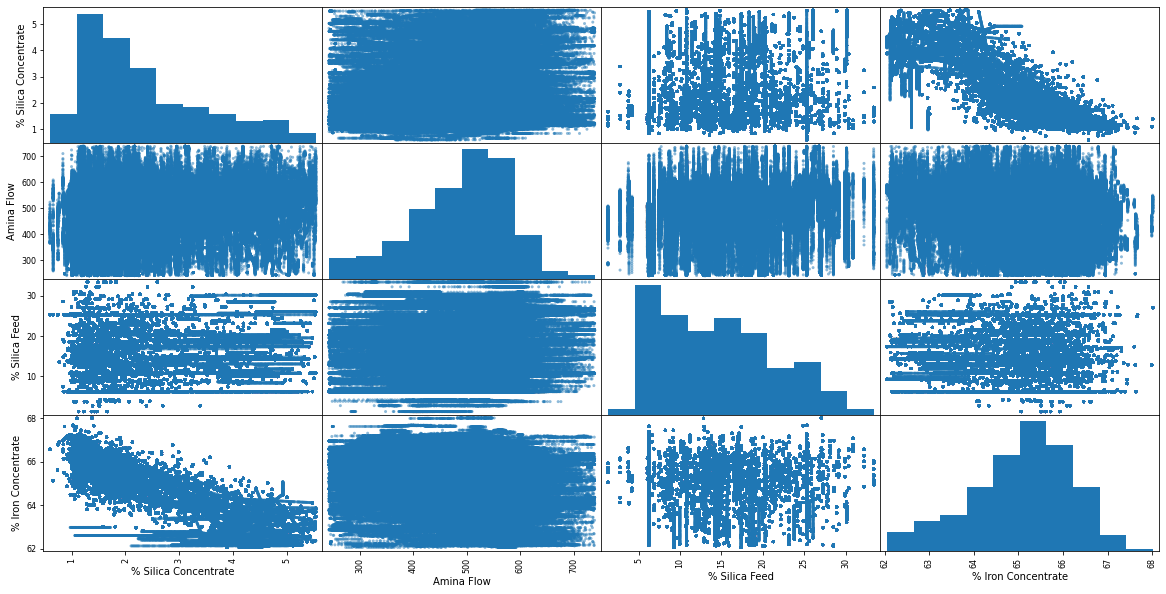

In [218]:
#산점도를 통해 상관관계 파악하기
from pandas.plotting import scatter_matrix

attributes=["% Silica Concentrate","Amina Flow","% Silica Feed","% Iron Concentrate"]
scatter_matrix(data[attributes],figsize=(20,10))
plt.show()

## 머신러닝 알고리즘을 위한 데이터 준비

In [230]:
data=strat_train_set.drop("% Silica Concentrate",axis=1)
Silica_labels=strat_train_set["% Silica Concentrate"].copy()

data=data.drop("date",axis=1)

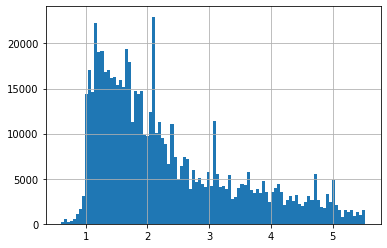

In [231]:
Silica_labels.hist(bins=100)
plt.show()

In [232]:
#가장 간단한 특성 스케일링 방법 - 정규화
from sklearn.preprocessing import MinMaxScaler
min_max_scaler=MinMaxScaler(feature_range=(-1,1))
data_num_min_max_scaled=min_max_scaler.fit_transform(data)

In [233]:
#표준화 (정규화와 다르게 특정 범위로 값을 제한하지 않음)
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()
data_num_std_scaled=std_scaler.fit_transform(data)

In [234]:
#간단한 선형 회귀 모델을 훈련하고 새로운 데이터에서 예측을 만들고 inverse_transform을 사용해보기
from sklearn.linear_model import LinearRegression
target_scaler=StandardScaler()
scaled_labels=target_scaler.fit_transform(Silica_labels.to_frame())
model=LinearRegression()
model.fit(data[["Starch Flow"]],scaled_labels)
some_new_data=data[["Starch Flow"]].iloc[:5]
scaled_predictions=model.predict(some_new_data)
predictions=target_scaler.inverse_transform(scaled_predictions)

In [235]:
#자동으로 레이블을 스케일링하고 스케일링된 레이블을 사용해 회귀 모델을 만드는 방법
from sklearn.compose import TransformedTargetRegressor

model=TransformedTargetRegressor(LinearRegression(),
                                transformer=StandardScaler())
model.fit(data[["Starch Flow"]],Silica_labels)
predictions=model.predict(some_new_data)

In [236]:
#사용자 정의 변환기 사용하기
from sklearn.preprocessing import FunctionTransformer

log_transformer=FunctionTransformer(np.log, inverse_func=np.exp)
log_pop=log_transformer.transform(data[["Starch Flow"]])

In [237]:
data["Flotation level growth rate"]=data["Flotation Column 07 Level"]/data["Flotation Column 01 Level"]*100

In [238]:
# data["Starch Flow"].head()
data.describe()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,Flotation level growth rate
count,663707.000000,663707.000000,663707.000000,663707.000000,663707.000000,663707.000000,663707.000000,663707.000000,663707.000000,663707.000000,...,663707.000000,663707.000000,663707.000000,663707.000000,663707.000000,663707.000000,663707.000000,663707.000000,663707.000000,663707.000000
mean,56.294288,14.652822,2869.044021,488.137724,397.574020,9.767714,1.680358,280.146436,277.141285,281.072773,...,290.761553,520.259438,522.597527,531.366000,420.325326,425.277054,429.896810,421.011947,65.050051,84.541468
std,5.158144,6.808003,1214.718797,91.262006,9.699447,0.386967,0.069280,29.625524,30.148175,28.564577,...,28.675992,131.080756,128.169783,150.858755,91.837502,84.582759,89.863221,84.918861,1.119057,22.824327
min,42.740000,1.310000,0.002026,241.669000,376.249000,8.753340,1.519820,175.510000,175.156000,176.469000,...,185.962000,149.218000,210.752000,126.255000,162.218000,166.991000,155.841000,175.349000,62.050000,20.454647
25%,52.670000,8.940000,2076.287050,431.776000,394.263000,9.527405,1.647270,250.280000,250.460000,250.854000,...,256.331500,416.968500,441.865000,411.286000,356.661500,357.640000,358.468000,356.731000,64.370000,72.065681
50%,56.080000,13.850000,3018.310000,504.443000,399.245000,9.798110,1.697600,299.344000,296.218000,298.697000,...,299.014000,491.878000,495.968000,494.278000,412.011000,408.805000,424.630000,411.060000,65.210000,82.322743
75%,59.720000,19.600000,3727.150000,553.268000,402.964000,10.037900,1.728330,300.149000,300.688000,300.382000,...,301.904000,594.129000,595.404000,601.239000,485.577500,484.346000,492.653944,476.529000,65.870000,97.358818
max,65.780000,33.400000,6300.230000,739.538000,418.641000,10.808100,1.853250,373.871000,375.992000,363.122000,...,371.593000,862.274000,828.903000,886.822000,680.359000,675.644000,698.861000,659.902000,68.010000,422.544720


## 변환 파이프라인

In [239]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

def column_ratio(X):
    return X[:,[0]]/X[:,[1]]

def ratio_name(function_trasformer, feature_names_in):
    return ["ratio"]

#빈 특성을 채우는 pipeline
def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler())

log_pipeline=make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler())
default_num_pipeline=make_pipeline(SimpleImputer(strategy="median"),
                                   StandardScaler())
preprocessing=ColumnTransformer([
    ("Flotation Level growth rate",ratio_pipeline(),["Flotation Column 07 Level","Flotation Column 01 Level"]),
    ("Flotation Air Flow growth rate", ratio_pipeline(),["Flotation Column 07 Air Flow","Flotation Column 01 Air Flow"]),
    ("log",log_pipeline, ["Starch Flow","Amina Flow","Ore Pulp Flow",
                         "Ore Pulp Density","Flotation Column 01 Air Flow","Flotation Column 02 Air Flow"
                         ,"Flotation Column 03 Air Flow","Flotation Column 04 Air Flow","Flotation Column 05 Air Flow"
                         ,"Flotation Column 06 Air Flow","Flotation Column 07 Air Flow","Flotation Column 01 Level"
                         ,"Flotation Column 02 Level","Flotation Column 03 Level","Flotation Column 04 Level"
                         ,"Flotation Column 05 Level","Flotation Column 06 Level","Flotation Column 07 Level"])
    ], 
    remainder=default_num_pipeline)

In [240]:
data_prepared=preprocessing.fit_transform(data)

In [241]:
data_prepared.shape

(663707, 25)

In [242]:
preprocessing.get_feature_names_out()

array(['Flotation Level growth rate__ratio',
       'Flotation Air Flow growth rate__ratio', 'log__Starch Flow',
       'log__Amina Flow', 'log__Ore Pulp Flow', 'log__Ore Pulp Density',
       'log__Flotation Column 01 Air Flow',
       'log__Flotation Column 02 Air Flow',
       'log__Flotation Column 03 Air Flow',
       'log__Flotation Column 04 Air Flow',
       'log__Flotation Column 05 Air Flow',
       'log__Flotation Column 06 Air Flow',
       'log__Flotation Column 07 Air Flow',
       'log__Flotation Column 01 Level', 'log__Flotation Column 02 Level',
       'log__Flotation Column 03 Level', 'log__Flotation Column 04 Level',
       'log__Flotation Column 05 Level', 'log__Flotation Column 06 Level',
       'log__Flotation Column 07 Level', 'remainder__% Iron Feed',
       'remainder__% Silica Feed', 'remainder__Ore Pulp pH',
       'remainder__% Iron Concentrate',
       'remainder__Flotation level growth rate'], dtype=object)

## 모델 선택과 훈련

In [243]:
from sklearn.linear_model import LinearRegression

lin_reg=make_pipeline(preprocessing,LinearRegression())
lin_reg.fit(data, Silica_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('Flotation Level growth rate',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function r...
                                                   'Flotation Column 03 Air '
                                                   'Flow',
                                                   'Flotation Column 04 Air '
                                                   'Flow',
                                                   'Flotation Column 05 Air '
                                                   'Flow',
                                                   'Flotation Column 06 Air '
                                                   'Flow',
                                                   'Flotation Column 07 Air '
                                                   'Flow',
                                                   'Flotation Column 01 Level',
                                                   'Flotation Column 02 Level',
                                                   'Flotation Column 03 Level',
                                                   'Flotation Column 04 Level',
                                                   'Flotation Column 05 Level',
                                                   'Flotation Column 06 Level',
                                                   'Flotation Column 07 '
                                                   'Level'])])),
                ('linearregression', LinearRegression())])

In [244]:
Silica_predictions=lin_reg.predict(data)

In [249]:
Silica_predictions[:5].round(2)

array([1.93, 1.88, 2.52, 2.03, 2.93])

In [246]:
Silica_labels.iloc[:5].values

array([1.68, 2.4 , 2.85, 1.57, 4.03])

In [250]:
from sklearn.metrics import root_mean_squared_error
lin_rmse=root_mean_squared_error(Silica_labels, Silica_predictions)
lin_rmse

0.6378810379766328

In [251]:
from sklearn.tree import DecisionTreeRegressor

tree_reg=make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(data, Silica_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('Flotation Level growth rate',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function r...
                                                   'Flotation Column 04 Air '
                                                   'Flow',
                                                   'Flotation Column 05 Air '
                                                   'Flow',
                                                   'Flotation Column 06 Air '
                                                   'Flow',
                                                   'Flotation Column 07 Air '
                                                   'Flow',
                                                   'Flotation Column 01 Level',
                                                   'Flotation Column 02 Level',
                                                   'Flotation Column 03 Level',
                                                   'Flotation Column 04 Level',
                                                   'Flotation Column 05 Level',
                                                   'Flotation Column 06 Level',
                                                   'Flotation Column 07 '
                                                   'Level'])])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [252]:
Silica_predictions=tree_reg.predict(data)
tree_rmse=root_mean_squared_error(Silica_labels, Silica_predictions)

tree_rmse

3.241079671764782e-14